# PyTorch Paper Replicating

Milestone Project 2: PyTorch Paper Replicating

In this project, we're going to be **replicating a machine learning research paper** and create a ***Vision Transformer(ViT)*** from scratch in PyTorch

We'll focus on creating the ViT architecture and apply to our FoodVision problem to classify different images of pizza, steak, and sushi.

## What is paper replicating?

The goal of **paper replicating** is to replicate the advances of machine learning with code so that we can use those techniques to our own problem.

We can use a new architecture that can work better on our own problem.

---

Machine Learning paper replicating involves turning a paper comprised of images/diagrams, math, and text into usable code. In our case usable PyTorch code.

![](08-vit-paper-what-is-paper-replicating-images-math-text-to-code.png)

We will convert Diagram, math equations and texts from a [ViT peper](https://arxiv.org/abs/2010.11929) in this project.

**How a Machine learning paper looks like?**
| Section |	Contents |
| :-: | :-:|
| Abstract| 	An overview/summary of the paper's main findings/contributions. |
| Introduction |	What's the paper's main problem and details of previous methods used to try and solve it. |
| **Method** | ***How did the researchers go about conducting their research? For example, what model(s), data sources, training setups were used?*** |
| **Results** |	*What are the outcomes of the paper? If a new type of model or training setup was used, how did the results of findings compare to previous works? (this is where **experiment tracking** comes in handy)* |
| Conclusion |	What are the limitations of the suggested methods? What are some next steps for the research community? |
| References |	What resources/other papers did the researchers look at to build their own body of work? |
| Appendix |	Are there any extra resources/findings to look at that weren't included in any of the above sections?|

## Why replicate a machine learning reseach paper?

A machine learning research paper is often a presentation of months if work and experiments done by some of the best machine leanring teams in the world condensed into a few pages of text.

It would be nice to check them out, if these experiments lead to better results in an area related to the problem we're working on.

***Also, replicating the work of others is a fantastic way to practice our skills.***
![](08-george-hotz-quote.png)

When we first start trying to replicate the research paper, we'll be overwhelmed.

Because, research paper is months/years of wors. It will take sometime to understand and reproduce the works. 

Replicating a research is a tough problem and lot of libraries, such as **`HuggingFace`**, **`PyTorch Image Models` (`timm`)** and **`fast.ai`** have been born out of making machine learning research more accessible.

***Where can we find code examples for machine learning research papers?***

One of the first things we'll notice when it comes to machine learning research is: **There's a lot of it**

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

There are several places to find and read machine learning reserach papers(and the code)

| Resource | What is it? |
| :-: | :-:|
| arXiv | a |
|Ak Twitter | a |
| Papers with Code | A curated collection of `trending`, `active` and `greatest machine learning papers`, many of which `include code` resources attached. Also `includes a collection of common machine learning datasets`, `benchmarks` and `current state-of-the-art models`. |
| lucidrains' `vit-pytorch` GitHub repository | Less of a place to find research papers and `more of an example of what paper replicating with code` on a `larger-scale` and `with a specific focus looks like`. The `vit-pytorch ` repository is a `collection of Vision Transformer model architectures` from `various research papers` **`replicated`** with **`PyTorch code`** (much of the inspiration for this notebook was gathered from this repository). |

## What we're going to cover

We're going to get hands-on and actually replicate a paper. 

***The process of replicating all papers will be slightly different but by seeing what it's like to do one, we'll get momentum ot do more.***

More specifically, we're going to be replicating the machine learning research paper [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) (ViT paper) with PyTorch.

The **Transformer** neural network architecture was originally introduced in the machine leanring research paper [Attention is all you need](https://arxiv.org/abs/1706.03762)

***And the original Transformer architecture was designed to work on one-dimensional sequences of text.**

A **Transformer architecture** is generally considered to be any neural network that uses the **attention mechanism**, as its primary learning layer.

This is similar to how convolutional neural network (CNN) uses convolutions as its primary learing layer.

**Vision Transformers (ViT) architecture was designed to adapt the original Transformer architecture to vision problem(s)**

The original Vision Transformer has been through several iterations over the past couple of years, however, we;re going to focus on replicating the original, otherwise known as the **vanilla Vision Transformer**. If we can recreate the original, we ca adapt it to others as well.

***<h3> We're going to focus on building Vit Architecture as per the original ViT paper and apply it to FoodVision.</h2>***

## Table of Contents

| Table | Contents |
| :-: | :-: |
| 0. Setting up | Download the previous code we have written and use it |
| 1. Get Data | Get data |
| 2. Create Datasets and DataLoaders | use `data_setup.py` for this |
| 3. Replicating the Vit Paper: an Overview | Breaking down paper into smaller chunks, so we can replicate the paper chunk buy chunk |
| 4. Equation 1: The Patch Embedding | a|
| 5. Equation 2: Multi-head Attention (MSA) | a|
|6. Equation 3: Multilayer Perceptron (MLP)| a|
|7. Creating the Transformer Encoder |a |
|8. Putting it all together to create ViT | a|
|9. Setting up training code for our Vit Model| a|
|10. Using a pretrianed ViT from `torchvision.models` | a |
|11. Make predictions on a custom image | a|

## 0. Setting up

In [2]:
import torch 
from torch import nn
import torchvision
from torchinfo import summary

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4177, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 4177 (delta 62), reused 103 (delta 39), pack-reused 4035 (from 1)
Receiving objects: 100% (4177/4177), 651.42 MiB | 8.79 MiB/s, done.
Resolving deltas: 100% (2433/2433), done.
Updating files: 100% (248/248), done.


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get Data

We'll use the `download_data` function from `helper_functions.py` that we created on 07. 

In [5]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

Now let's set the download training and test directories.

In [6]:
train_dir = image_path  / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and DataLoaders

let's convert the data we downloaded to `DataLoader`

we'll use `create_dataloaders()` frm `data_setup.py`

<hr/>
First, we'll create a transform to prepare our images.

***This is where one of the first references to ViT paper will come in.***

In Table 3 (of the ViT Paper), the training resolution is mentioned as being 224 (height = 224, width = 224)
![](08-vit-paper-image-size-and-batch-sizepng)

**Note:** We can often find various hyperparameter settings listed in a table. In this case we're still preparing our data so ***we're mainly concerned with thing like image size and batch size.***

We'll make sure our transform resizes our images appropriately.

`Since we'll be training our model from scratch (no transfer learning), we dont't have to normalize transform like we did in Transfer learning module.`

### 2.1. Prepare transforms for images

In [7]:
IMG_SIZE = 224

# create transform pipeline manually
manual_transform = transforms.Compose([
    transforms.Resize(size=(IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

manual_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

### 2.2. Turn Images into `DataLoader`

The ViT paper states that use of of `batch size = 4096` which is 128x the size of the batch size we've been working on.

However, we're going to stick with the batch size of 32.

because of the hardware not being able to handle that many images at a time.

**Note:** we're using `pin_memory=True` becuase it avoids unnecessary copying of memory between the CPU and GPU memory by `pinning` examples that have been seen before. The benefits of this is likely to be seen with larget dataset sizes.

Also `pin_memory=True` doesn't always improve performance. It works sometimes, sometimes it doesn't work.

In [8]:
BATCH_SIZE = 32

#create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transform,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x120abc730>,
 ['pizza', 'steak', 'sushi'])

### 2.3 Visualize a single image

An important step in the ViT paper is `preparing the images` into patches.

We'll get to what this means in section 4 but for now, lets view a single image and its label.

In [9]:
# get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# get a single image from the batch
image, label = image_batch[0], label_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

Now let's view images with `matplotlib`

(-0.5, 223.5, 223.5, -0.5)

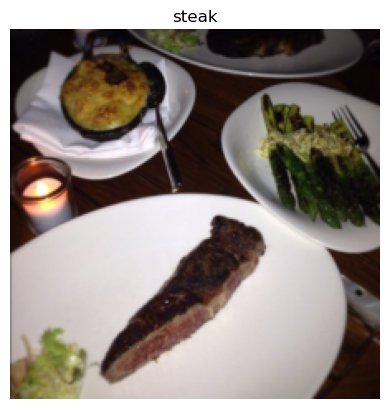

In [13]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

## 3. Replicating the ViT Paper: An Overview

Before writing any more code, we should know what we're doing.

We're replicating the `ViT paper` for our own problem - FoodVision.

So our **model inputs** are: `images` of **pizza, steak, or sushi**

and our ideal **model outputs** are: `predicted labels of **pizza, steak, or sushi**

No different to what we've been doing throughout the previous sections.

The question is: **how do we go from our inputs to the desired outputs?**

### 3.1. Inputs and outpus, layers, and blocks

ViT is a deep learning neural network architecture.

And any neural network architecture is generally comprised of **`layers`**

And a collection of layers is often referred to as a `block`.

and stacking many blocks together is what gives us the whole architecture.

---

A **layer** takes an `input`(say an image tensor), performs some kind of function on it (for example what's in the layer's `forward()` method) and then return the output from it.

So if a single layer takes an input and gives an output, then a collection of layers or or a `block` also takes an input and gives an output.

<div class='alert alert-success'>
    Lets make this concrete:
</div>

- **`Layer`** - Takes an `input`, performs a `function` on it, and returns an ouput
- **`Block`** - A `collection of layers`, takes an input, performs a series of functions on it, and returns an output.
- **`Architecture` or model** - a `collection of blocks`, takes an input, performs a series of functions on it, returns an output.

**This ideology is what we're going to be using to replicate the ViT Paper**

We're going to take it `layer by layer`, `block by block`, and `function by function` putting the pieces of the puzzle together like Lego to get our desired overall architecture.

<span class='alert alert-success'> The reason we do this is because looking at a whole research paper can be intimidating.</span>

So for a better understanding, we'll break it down.
- Starting with the inputs and outputs of single layer
- and working up to the inputs and outputs of the whole model.

![](08-vit-paper-intputs-outputs-layers-and-blocks.png)
*A modern deep learning architecture is usually collection of layers and blocks. Where layers take an input. and maniputate it using some kind of function, and then output it. `Blocks` are generally stacks of layers on top of each other doing a similar thing to a single layer but multiple times*

- `input` - data as a numerial representation
- `function` - the self-attention formula pictured above, however, this function could be almost anything

### 3.2. Getting Specific: What's ViT made of?

There are many little details about the ViT model sprinkled throughout the paper.

Finding them all is like one big treasure hunt.

Remember, **A research paper is often months of work compressed into a few pages so it's understandable for it to take of practice to replicate.**

However, the main three resources we'll be looking at for the architecture design are:
1. **Figure 1** - This gives an overview of the model in a graphical sense, we could almost recreate the architecture with this figure alone.
2. **Four equations in section 3.1** - These equations give a little bit more of a mathematical grounding to the colored blocks in Figure 1.
3. **Table 1** - This table shows the various hyperparameter settings (such as number of layers asnd number of hidden units) for different ViT model variants. We'll be focused on the smallest version,`ViT-Base`.


#### 3.2.1 Exploring **`Figure 1`**
Let's start by going through Figure 1 of the ViT Paper.

The main things we'll be playing attention to are:

1. **Layers** - takes an **`input`**, performs an operation or function on the input, produces an **`ouput`**
2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**

![](08-vit-paper-figure-1-inputs-and-outputs.png)

*Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers, and blocks that create the architecture. Our goal will be to replicate each of these using PyTorch code.*

The ViT architecture is comprised of several stages:

- **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.
  
- **Linear projection of flattened patches (Embedded Patches)** - The image patches get turned into an **embedding**, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable* representation (typically in the form of a vector) of the image that can improve with training.

- **Norm** - This is short for `Layer Normalization` or `LayerNorm`, a techinique for regularizing (reducing overfitting) a neural network, you can use `LayerNorm` via the PyTorch layer `torch.nn.LayerNorm()`

- **Multi-Head Attention** - This is a `Multi-Headed Self-Attention layer` or `MSA` for short. We can create an MSA layer via the PyTorch layer `torch.nn.MultiheadAttention()`

- **MLP (or Multilayer perception)** - A MLP can often refer to any collection of feedforward layers(or in PyTorch's case, a collection of layers with `forward()` method). In the ViT paper, the authors refer to the MLP as `MLP block` and it contains two `torch.nn.Linear()` layers with a `torch.nn.GELU` non-linearity activation in between them (section 3.1) and a `torch.nn.Dropout()` layer after each(Appendix B.1)

- **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above There are two skip connections inside the Transformer encoder(the '+' symbols) meaning the layer's input are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transfer encoders stacked on top of eachother.

- **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class ouput. Since we're working on image classification, you could also call this the `classifier head`. The structure of the MLP Head is similar to the MLP block.


We might notice that many of the pieces of the ViT architecture can be created with existing PyTorch layers.

This is because of how PyTorch is designed, it's one of the main purposes of PyTorch to create resuable neural network layers for both researchers and machine learning practitioners

> **Question**: Why not code everything from scratch?
> 
> We could definitely do that by reproducing all of the math equations from the paper with custom PyTorch layers and that would certainly be an educative exercise, however, using pre-existing PyTorch layers is usually favoured as pre-existing layers have often been extensively tested and performance checked to make sure they run correctly and fast.

> **Note**: we're going to be focused on writing PyTorch code to create these layers. For the background on what each of these layers does, reading the ViT Paper in full or reading the linked resources for each layer is advised.

![](08-vit-paper-figure-1-inputs-and-outputs-food-mini.png)
*Figure 1 from the ViT Paer adapted for use with FoodVision. An image of food goes in (pizza), the image gets turned into patches, and then projected to an embedding. The embedding then travels through the various layers and blocks and (hopefully) the class 'pizza' is returned.*

#### 3.2.2. Exploring the Four Equations

The next main part(s) of the ViT paper we're going to look at are the four equations in `section 3.1`
![](08-vit-paper-four-equations.png)

These *four equations* represent the math behind the four major parts of the ViT architecture.

*Section 3.1* describes each of these.

| Equation number |	Description from ViT paper section 3.1|
|:-: | :-:|
|1 | ...The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with **a trainable linear projection** (Eq. 1). We refer to the output of this projection as the **patch embeddings**... **Position embeddings** are added to the patch embeddings to retain positional information. We use standard **learnable 1D position embeddings**... |
|2 |	The Transformer encoder (Vaswani et al., 2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). **Layernorm (LN) is applied before every block, and residual connections after every block** (Wang et al., 2019; Baevski & Auli, 2019).|
|3|	Same as equation 2.|
|4|	Similar to BERT's [ *class* ] token, we **prepend a learnable embedding to the sequence of embedded patches** $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4)...|

Let's map these descriptions to the ViT architecture in Figure 1.
![](08-vit-paper-mapping-the-four-equations-to-figure-1.png)

There's a lot happening in the image above but following the colored lines and arrows receals the main concepts of the ViT Architecture.

**`Let's break down each equation further (it will be our goal to recreate these with code):`**

In all equations (except 4), "$\mathbf{z}$" ` <- is the raw output of a particular layer` :
1. "$\mathbf{z}_{0}$" is `z zero` (this is the ouput of the initial patch embedding layer)
2. "$\mathbf{z}_{\ell}^{\prime}$"  is `z of a particular layer prime` (or an intermediary value of z)
3. "$\mathbf{z}_{\ell}$" is `z of a particular layer`

And $\mathbf{y}$ is the overall output of the architecture.

#### 3.2.3 Equation 1 overview
$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

This equation deals with the class token, path embedding, and position embedding ($\mathbf(E)$ is for embedding)  of the input image.

In vector form, the embedding might look something like:

**<div class='alert alert-info'> x_input = [class_token, image_patch_1, image_patch_2, image_patch_3...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position...]</div>**

Where each of the elements in the vector is learnable (i.e. `requires_grad=True`)

#### 3.2.4 Equation 2 Overview
$$\begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$


This says that for every layer from $1$ through $L$ (total number of layers), there's a `Multi-Head Attention layer (MSA)` wrapping a `LayerNorm (LN) layer`.

The addition on the end is the equivalent of adding the input to the output and forming a [skip/residual connection](https://paperswithcode.com/method/residual-connection).

We'll call his layer the `MSA block`

In pseudocode, this looks like:
**<div class='alert alert-info'> x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input</div>**

Notice the `skip connection` on the end (adding the input of the layers to the output of the layers)

#### 3.2.5 Equation 3 Overview

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\ \end{aligned} $$

This says that, for every layer from $1$ to $L$(the total number of layers), there's also a Multilayer Perceptron layer(MLP) wrapping a LayerNorm layer (LN)

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer `MLP Block`

the pseudocode might look like :
**<div class='alert alert-info'> x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block</div>**

Notice the skip connection on the end (adding the input of the layers to the output of the layers).

#### 3.2.4. Equation 4 Overview

$$ \begin{aligned} \mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & & \end{aligned} $$

This says for the last layer $L$, the output $y$ is the 0 index token of $z$ wrapped in a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block`:

**<div class='alert alert-info'>y = Linear_layer(LN_layer(x_output_MLP_block[0]))</div>**

Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

#### 3.2.7 Exploring Table 1

The final piece of the ViT architecture puzzle, we'll focus on Table 1.

| Model| Layers| Hidden size $D$ | MLP size | Heads | Params |
| :-: | :-: | :-:|:-:|:-:|:-:|
|ViT-Base|	12|	768|	3072|	12|	$86M$|
|ViT-Large|	24|	1024|	4096|	16|	$307M$|
|ViT-Huge|	32|	1280|	5120|	16| $632M$|

*Table 1: Details of Vision Transformer model variants. Source: ViT paper.*

This table is showcasing th various hyperparameters of each of the ViT architectures.

We can see the numbers are gradually increasing from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base but we'll be writing code that could easily scale up to the larger variants.

**Breaking the hyperparameters down:**
1. **Layers**
   - How Many `Transformer Encoder` blocks are there? (each of these will contain a MSA block and MLP block)
3. **Hidden size $D$**
   - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better results. However, a larger embedding comes at the cost of more compute.
5. **MLP Size**
   - What are the numbers of hidden units in the MLLP layers.
7. **Heads**
   - How many heads are there in the Multi-Head Attention layers?
9. **Params**
    - What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more compute. We'll notive even ViT-Base has far more parameters than any other model we've used so far.
  
We'll `use` these `values` as the `hyperparameter settings` for our `ViT architecture`.